# AD Click Through Rate Analysis

Click-through rate is the ratio of users who clicked on an ad/link to the number of total users who left impressions on the ad/link. In simple words, clicks ÷ impressions = CTR. Analyzing the click-through rate helps companies determine the types of people most likely to click on their ads. A high CTR gives validation to your advertising strategies.

Below are all the features in the dataset:

Daily Time Spent on Site: the daily timespan of the user on the website;

Age: the age of the user;

Area Income: the average income in the area of the user;

Daily Internet Usage: the daily internet usage of the user;

Ad Topic Line: the title of the ad;

City: the city of the user;

Gender: the gender of the user;

Country: the country of the user;

Timestamp: the time when the user visited the website;

Clicked on Ad: 1 if the user clicked on the ad, otherwise 0;

# Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [39]:
df=pd.read_csv("ad_10000records.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1
...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:15,1
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:15,0
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:17,0
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,2016-04-04 07:07:46,1


In [40]:
df.shape

(10000, 10)

In [41]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [42]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [43]:
df.dtypes

Daily Time Spent on Site    float64
Age                         float64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Gender                       object
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [45]:
df["Clicked on Ad"]=df["Clicked on Ad"].map({1:"Yes",0:"No"})

# Click Through Rate Analysis

In [46]:
def boxplot_compare(df, col1):
    plt.figure(figsize=(8, 6))    
    sns.boxplot(x='Clicked on Ad', y=col1, data=df)
    plt.title(f'Boxplot of {col1} by Clicked on Ad')
    plt.xlabel('Clicked on Ad')
    plt.ylabel(col1)
    plt.show()

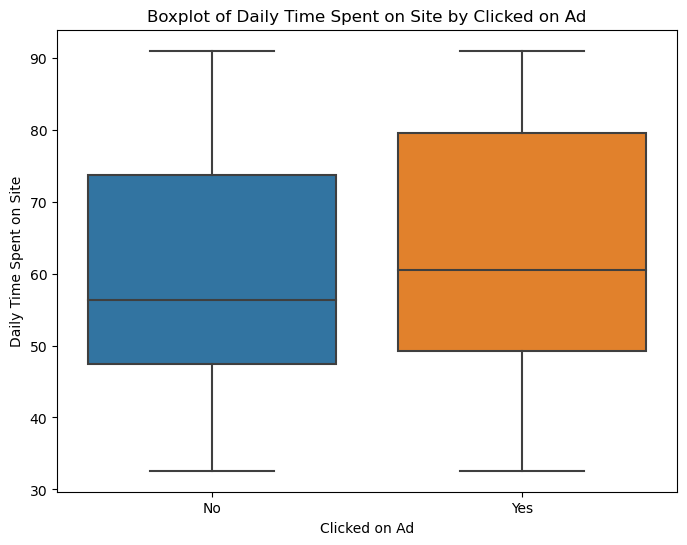

In [47]:
boxplot_compare(df,"Daily Time Spent on Site")

From the above graph, we can see that the users who spend more time on the website click more on ads. 

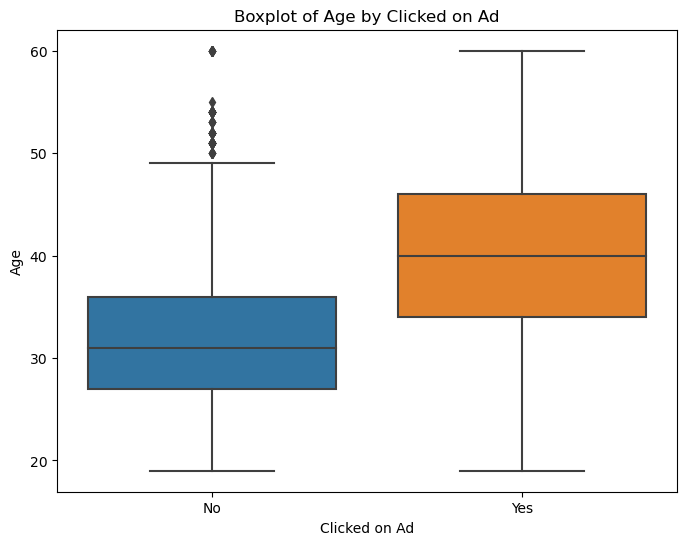

In [48]:
boxplot_compare(df,"Age")

From the above graph, we can see that users around 40 years click more on ads compared to users around 27-36 years old.

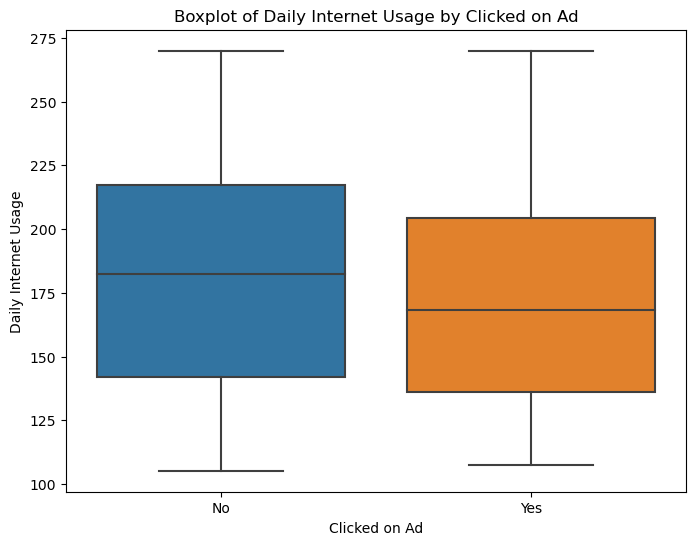

In [49]:
boxplot_compare(df,"Daily Internet Usage")

From the above graph, we can see that the users with high internet usage click less on ads compared to the users with low internet usage. 

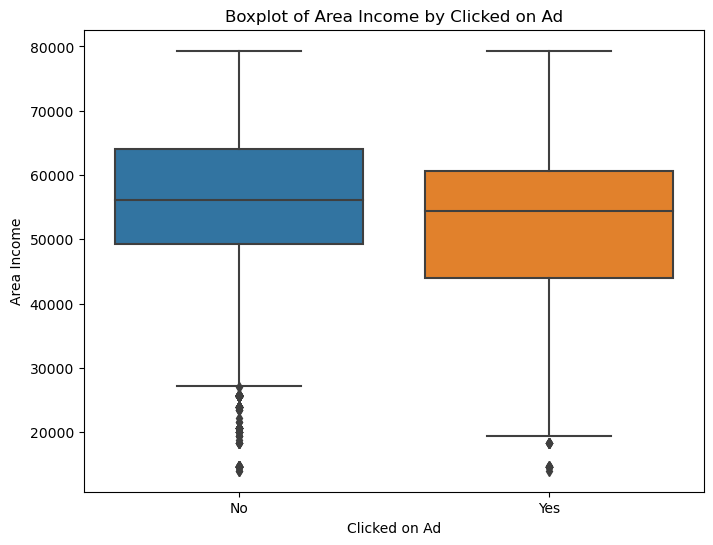

In [50]:
boxplot_compare(df,"Area Income")

There’s not much difference, but people from high-income areas click less on ads.

In [54]:
a=pd.crosstab(df["Gender"],df["Clicked on Ad"])
a["Gender CTR"]=(a["Yes"]/(a["Yes"]+a["No"]))*100
a

Clicked on Ad,No,Yes,Gender CTR
Gender,,,
Female,2609,2767,51.469494
Male,2474,2150,46.496540


We See that Female generelly Have a High CTR than Men(we know why :) )

# Calculating CTR of Ads

Now let’s calculate the overall Ads click-through rate. Here we need to calculate the ratio of users who clicked on the ad to users who left an impression on the ad. 

In [60]:
x=df["Clicked on Ad"].value_counts()[1]
ctr=(x/df.shape[0])*100
print("CTR is:",ctr)

CTR is: 49.17


# Click Through Rate Prediction Model

Now let’s move on to training a Machine Learning model to predict click-through rate. I’ll start by dividing the data into training and testing sets:

In [55]:
df["Gender"] = df["Gender"].map({"Male": 1, 
                               "Female": 0})

x=df.iloc[:,0:7]
x=x.drop(['Ad Topic Line','City'],axis=1)
y=df.iloc[:,9]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,
                                           test_size=0.2,
                                           random_state=4)

Now let’s train the model using the random forecast classification algorithm:

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier()

Now let’s have a look at the accuracy of the model:

In [61]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(xtest)
print("The accuracy is: ",(accuracy_score(ytest,y_pred))*100)

The accuracy is:  95.7


# Now let’s test the model by making predictions:

In [58]:
print("Ads Click Through Rate Prediction : ")
a = float(input("Daily Time Spent on Site: "))
b = float(input("Age: "))
c = float(input("Area Income: "))
d = float(input("Daily Internet Usage: "))
e = input("Gender (Male = 1, Female = 0) : ")

features = np.array([[a, b, c, d, e]])
print("Will the user click on ad = ", model.predict(features))

Ads Click Through Rate Prediction : 
Daily Time Spent on Site: 70.20
Age: 35
Area Income: 40000
Daily Internet Usage: 220
Gender (Male = 1, Female = 0) : 1
Will the user click on ad =  ['No']


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Summary

Ads CTR means predicting whether the user will click on the ad. In this task, we need to train a Machine Learning model to find relationships between the characteristics of all the users who click on ads.